In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
df.shape

(4803, 20)

In [10]:
x = df.iloc[0]

In [12]:
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [13]:
' '.join(''.join(item['name'].split()) for item in j)

'Action Adventure Fantasy ScienceFiction'

In [14]:
def genre_keywords_tostring(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(item['name'].split()) for item in genres)
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(item['name'].split()) for item in keywords)
    
    return "%s %s" % (genres,keywords)

In [15]:
df['string'] = df.apply(genre_keywords_tostring, axis = 1)

In [17]:
df.iloc[0]['string']

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [39]:
tfidf = TfidfVectorizer(max_features=2000)

In [40]:
X = tfidf.fit_transform(df['string'])

In [41]:
movieId = pd.Series(df.index, index=df['title'])
movieId

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [42]:
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [43]:
idx = movieId['Interstellar']
idx

95

In [44]:
df.iloc[95]['string']

'Adventure Drama ScienceFiction savingtheworld artificialintelligence fathersonrelationship singleparent nasa expedition wormhole spacetravel famine blackhole dystopia raceagainsttime quantummechanics spaceship space rescue familyrelationships farmhouse robot astronaut scientist fatherdaughterrelationship singlefather farmer spacestation imax astrophysics zerogravity courage timeparadox relativity'

In [45]:
X[idx].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [46]:
query = X[idx]

In [47]:
similar = cosine_similarity(query, X)
similar

array([[0.10555493, 0.00901527, 0.01780591, ..., 0.00596297, 0.        ,
        0.        ]])

In [50]:
similar = similar.flatten()

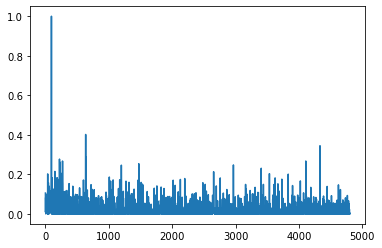

In [51]:
plt.plot(similar);

In [52]:
(-similar).argsort()

array([  95,  635, 4332, ..., 2510, 2477, 4802], dtype=int64)

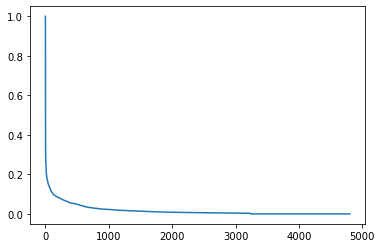

In [53]:
plt.plot(similar[(-similar).argsort()])

In [54]:
top_rcmnd = (-similar).argsort()[1:8]

In [55]:
top_rcmnd

array([ 635, 4332,  643,  222, 4108,  270,  228], dtype=int64)

In [58]:
df['title'].iloc[top_rcmnd]

635                     Apollo 13
4332               Silent Running
643                 Space Cowboys
222                       Elysium
4108    In the Shadow of the Moon
270                   The Martian
228                      Oblivion
Name: title, dtype: object

In [62]:
def recommend(title):
    idx = movieId[title]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
    query = X[idx]
    similar = cosine_similarity(query, X)
    similar = similar.flatten()
    top_rcmnd = (-similar).argsort()[1:8]
    return df['title'].iloc[top_rcmnd]

In [63]:
print(recommend('The Dark Knight Rises'))

65      The Dark Knight
119       Batman Begins
2864          Arbitrage
210      Batman & Robin
1740         Kick-Ass 2
1359             Batman
428      Batman Returns
Name: title, dtype: object
